**1 # Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.**

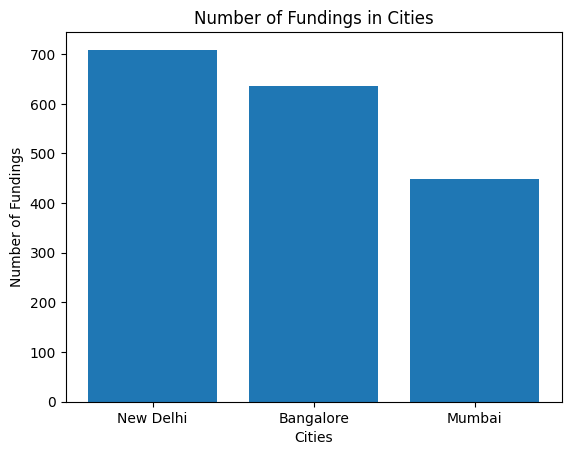

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the startup funding dataset into a DataFrame
df_start = pd.read_csv('startup_funding.csv', encoding='utf-8')

# Remove rows where the 'CityLocation' column is missing or NaN
df_start.dropna(subset=['CityLocation'], inplace=True)

# Define a function to extract the city name from the 'CityLocation' column
def separateCity(city):
    return city.split('/')[0].strip()

# Apply the 'separateCity' function to the 'CityLocation' column to extract the city names
df_start['CityLocation'] = df_start['CityLocation'].apply(separateCity)

# Replace some common misspellings of city names
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)

# Replace NCR cities with New Delhi
df_start['CityLocation'].replace(["Gurgaon", "Noida"], "New Delhi", inplace=True)

# Extract the funding counts for the given locations
city_fund_counts = df_start.loc[df_start['CityLocation'].isin(['Bangalore', 'Mumbai', 'New Delhi']), 'CityLocation'].value_counts()

# Plot the bar graph
plt.bar(city_fund_counts.index, city_fund_counts.values)

# Set the chart title and axis labels
plt.title('Number of Fundings in Cities')
plt.xlabel('Cities')
plt.ylabel('Number of Fundings')

# Display the plot
plt.show()


**2 # Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.**

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


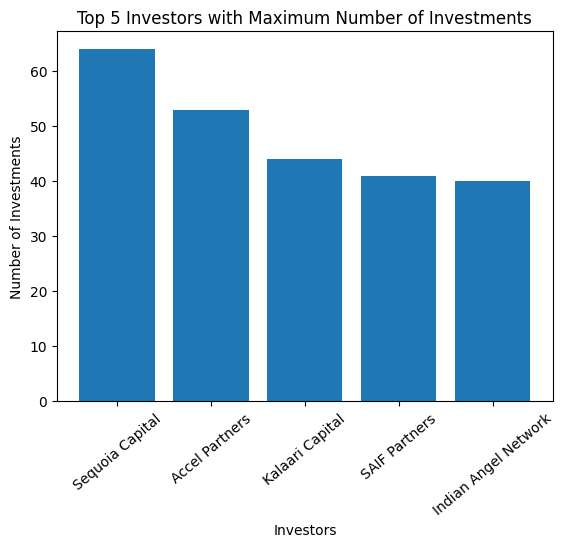

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv', encoding='utf8')

# Drop rows where the startup name or investors name is missing
df.dropna(subset=['StartupName', 'InvestorsName'], inplace=True)

# Replace various versions of startup names with a consistent name
df['StartupName'].replace(['Flipkart.com', 'Flipkart'], 'Flipkart', inplace=True)
df['StartupName'].replace(['Ola Cabs', 'Olacabs'], 'Ola', inplace=True)
df['StartupName'].replace(['Oyo Rooms', 'OYO Rooms', 'OyoRooms', 'Oyorooms'], 'Oyo', inplace=True)
df['StartupName'].replace(['Paytm Marketplace', 'Paytm'], 'Paytm', inplace=True)

# Drop rows with undisclosed investors 
Undisclosed = ['Undisclosed', 'Undisclosed Investors']
df = df[~df['InvestorsName'].isin(Undisclosed)]

# Split the investors name into a list and count the occurrences of each investor
investors_counts = {}
for investors in df['InvestorsName']:
    for investor in investors.split(','):
        investor = investor.strip()
        if investor:
            investors_counts[investor] = investors_counts.get(investor, 0) + 1

# Find the top 5 investors with the maximum number of investments
max_investments = sorted(investors_counts.items(), key=lambda x: x[1], reverse=True)[:5]

for investor, count in max_investments:
    print(investor, count)
    
plt.bar([x[0] for x in max_investments], [x[1] for x in max_investments])
plt.xlabel('Investors')
plt.ylabel('Number of Investments')
plt.title('Top 5 Investors with Maximum Number of Investments')
plt.xticks(rotation = 40)
plt.show()

**3 # After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


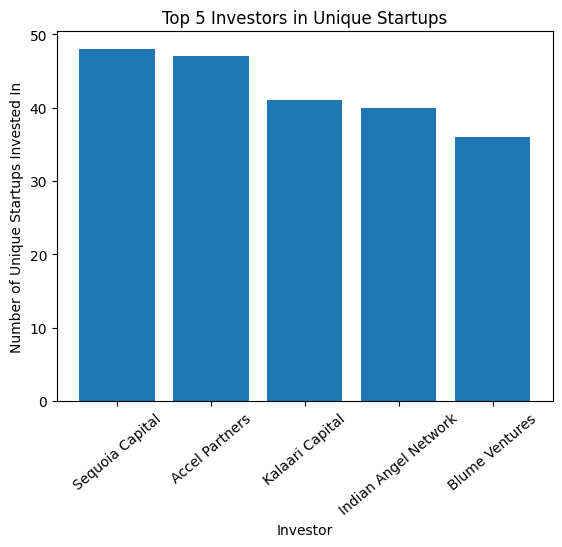

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the CSV file
df = pd.read_csv('startup_funding.csv', encoding='utf8')

# Drop rows where the startup name or investors name is missing
df.dropna(subset=['StartupName', 'InvestorsName'], inplace=True)

# Replace various versions of startup names with a consistent name
df['StartupName'].replace(['Flipkart.com', 'Flipkart'], 'Flipkart', inplace=True)
df['StartupName'].replace(['Ola Cabs', 'Olacabs'], 'Ola', inplace=True)
df['StartupName'].replace(['Oyo Rooms', 'OYO Rooms', 'OyoRooms', 'Oyorooms'], 'Oyo', inplace=True)
df['StartupName'].replace(['Paytm Marketplace', 'Paytm'], 'Paytm', inplace=True)

# Drop rows with undisclosed investors
Undisclosed = ['Undisclosed', 'Undisclosed Investors']
df = df[~df['InvestorsName'].isin(Undisclosed)]

# Create a dictionary to keep track of the number of unique startups each investor has invested in
investors_unique_startups = {}

# Loop through the rows of the dataframe
for index, row in df.iterrows():
    # Get the investors and startup name for this row
    investors = row['InvestorsName'].split(',')
    startup = row['StartupName']
    
    # Loop through the investors and add them to the dictionary with the startup name as the key
    for investor in investors:
        investor = investor.strip()
        if investor:
            investor_unique_startups = investors_unique_startups.get(investor, set())
            investor_unique_startups.add(startup)
            investors_unique_startups[investor] = investor_unique_startups

# Create a dictionary to keep track of the number of investments each investor has made in unique startups
investors_investments = {}

# Loop through the dictionary of investors and unique startups
for investor, unique_startups in investors_unique_startups.items():
    # Count the number of unique startups the investor has invested in
    num_unique_startups = len(unique_startups)
    
    # Add the number of investments to the dictionary of investors and investments
    investors_investments[investor] = investors_investments.get(investor, 0) + num_unique_startups

# Find the top 5 investors who have invested in the most number of unique startups
top_investors = sorted(investors_investments.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the result
for investor, num_unique_startups in top_investors:
    print(investor, num_unique_startups)

# Extract the investor names and their number of investments into separate lists
investors = [x[0] for x in top_investors]
investments = [x[1] for x in top_investors] 

plt.bar(investors, investments)
plt.xlabel('Investor')
plt.ylabel('Number of Unique Startups Invested In')
plt.title('Top 5 Investors in Unique Startups')
plt.xticks(rotation = 40)
plt.show()

**4 # Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the startup funding data
df = pd.read_csv('startup_funding.csv', encoding='utf8')

# Replace various versions of startup names with a consistent name
df['StartupName'].replace(['Flipkart.com', 'Flipkart'], 'Flipkart', inplace=True)
df['StartupName'].replace(['Ola Cabs', 'Olacabs'], 'Ola', inplace=True)
df['StartupName'].replace(['Oyo Rooms', 'OYO Rooms', 'OyoRooms', 'Oyorooms'], 'Oyo', inplace=True)
df['StartupName'].replace(['Paytm Marketplace', 'Paytm'], 'Paytm', inplace=True)

# Replace various versions of investment types with a consistent name
df['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace=True)
df['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace=True)
df['InvestmentType'].replace('DebtFunding', 'Debt Funding', inplace=True)
df['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace=True)

# Keep only rows with Seed Funding or Crowd Funding as the InvestmentType
df = df[df['InvestmentType'].isin(['Seed Funding', 'Crowd Funding'])]

# Drop rows where the startup name or investors name is missing
df.dropna(subset=['StartupName', 'InvestorsName'], inplace=True)

# Drop rows with undisclosed investors
Undisclosed = ['Undisclosed', 'Undisclosed Investors']
df = df[~df['InvestorsName'].isin(Undisclosed)]

# Create a dictionary of the number of startups each investor has invested in
investors_counts = {}
for index, row in df.iterrows():
    investors = row['InvestorsName'].split(',')
    investment_type = row['InvestmentType']
    if investment_type in ['Seed Funding', 'Crowd Funding']:
        for investor in investors:
            investor = investor.strip()
            if investor:
                if investor not in investors_counts:
                    investors_counts[investor] = set()
                investors_counts[investor].add(row['StartupName'])

# Create a dictionary of the number of times each investor has invested
investors_investments = {}
for index, row in df.iterrows():
    investors = row['InvestorsName'].split(',')
    investment_type = row['InvestmentType']
    if investment_type in ['Seed Funding', 'Crowd Funding']:
        for investor in investors:
            investor = investor.strip()
            if investor:
                if investor not in investors_investments:
                    investors_investments[investor] = 0
                investors_investments[investor] += 1

# Create a list of the top 5 investors who have invested in the most number of startups
top_investors = sorted(investors_investments, key=investors_investments.get, reverse=True)[:5]

for investor in top_investors:
    if investor in investors_counts:
        startups_count = len(investors_counts[investor])
        print(investor, startups_count)

print(df['InvestmentType'].unique())


Indian Angel Network 33
Rajan Anandan 23
Undisclosed investors 24
LetsVenture 16
Anupam Mittal 16
['Seed Funding' 'Crowd Funding']


**5 # Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the startup funding data
df = pd.read_csv('startup_funding.csv', encoding='utf8')

# Replace various versions of startup names with a consistent name
df['StartupName'].replace(['Flipkart.com', 'Flipkart'], 'Flipkart', inplace=True)
df['StartupName'].replace(['Ola Cabs', 'Olacabs'], 'Ola', inplace=True)
df['StartupName'].replace(['Oyo Rooms', 'OYO Rooms', 'OyoRooms', 'Oyorooms'], 'Oyo', inplace=True)
df['StartupName'].replace(['Paytm Marketplace', 'Paytm'], 'Paytm', inplace=True)

# Replace various versions of investment types with a consistent name
df['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace=True)
df['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace=True)
df['InvestmentType'].replace('DebtFunding', 'Debt Funding', inplace=True)
df['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace=True)

# Keep only rows with Private Equity as the InvestmentType
df = df[df['InvestmentType'] == 'Private Equity']

# Drop rows where the startup name or investors name is missing
df.dropna(subset=['StartupName', 'InvestorsName'], inplace=True)

# Drop rows with undisclosed investors
Undisclosed = ['Undisclosed', 'Undisclosed Investors']
df = df[~df['InvestorsName'].isin(Undisclosed)]

# Create a dictionary of the number of startups each investor has invested in
investors_counts = {}
for index, row in df.iterrows():
    investors = row['InvestorsName'].split(',')
    for investor in investors:
        investor = investor.strip()
        if investor:
            if investor not in investors_counts:
                investors_counts[investor] = set()
            investors_counts[investor].add(row['StartupName'])

# Create a dictionary of the number of times each investor has invested
investors_investments = {}
for index, row in df.iterrows():
    investors = row['InvestorsName'].split(',')
    for investor in investors:
        investor = investor.strip()
        if investor:
            if investor not in investors_investments:
                investors_investments[investor] = 0
            investors_investments[investor] += 1

# Create a list of the top 5 investors who have invested in the most number of startups
top_investors = sorted(investors_investments, key=investors_investments.get, reverse=True)[:5]

for investor in top_investors:
    if investor in investors_counts:
        startups_count = len(investors_counts[investor])
        print(investor, startups_count)

print(df['InvestmentType'].unique())



Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
SAIF Partners 24
Blume Ventures 27
['Private Equity']
